# Исследование "Прогноз оттока клиентов фитнес-клуба"
<a class="tocSkip">

## Цель исследования

<div style="border: ridge black 3px; padding: 25px">

<b>Целью данного исследования является прогноз и определение отличительных признаков и характеристик, влияющих на факт оттока клиентов фитнес-клуба.</b><br><br>

Мы изучим предоставленные данные, произведем предобработку, исследовательский анализ, построим модель прогнозирования. В конце исследования сформулируем общий вывод и <b>дадим рекомендации</b> для улучшения стратегии удержания клиентов.

</div>

## Описание исходных данных

**Ниже представлено описание доступной нам информации по датафрейму**.

Нам предоставлены данные на месяц до оттока и факт оттока на определённый месяц. 

**Набор данных включает следующие поля:**

- `Churn` — факт оттока в текущем месяце;

Данные клиента за предыдущий до проверки факта оттока месяц:
- `gender` — пол;
- `Near_Location` — проживание или работа в районе, где находится фитнес-центр;
- `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- `Phone` — наличие контактного телефона;
- `Age` — возраст;
- `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

- `Contract_period` — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
- `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
- `Group_visits` — факт посещения групповых занятий;
- `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
- `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
- `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.


## Открытие данных

In [1]:
# импортируем основные нужные библиотеки 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings('ignore')

In [2]:
# читаем файл и присваиваем ему одноименное название

gym_data = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
# выведем на экран общую информацию и первые 10 строк содержимого

print(gym_data.info())
print('--------------------------------------------------------------------------------------------------------------------')
display(gym_data.head(10))  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB
None
-----------------------------

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


Как мы видим:
- пропусков нет
- изменение типа данных не требуется
- часть датафрейма заполнена бинарными признаками `0` или `1` (столбцы `gender`, `Near_Location`, `Partner`, `Promo_friends`, `Phone`, `Age`, `Lifetime`, `Churn`)

Названия столбцов приведем к нижнему регистру для удобства работы и проверим датафрейм на дубликаты.

## Предобработка данных

In [4]:
# приведем к нижнему регистру названия всех столбцов для удобства

gym_data.columns = gym_data.columns.str.lower()


# проверяем датафрейм на наличие грубых дубликатов

duplicates = gym_data.duplicated().sum()
if duplicates > 0:
    print('Количество дубликатов =', duplicates)
else:
    print('Дубликатов не найдено')

Дубликатов не найдено


## Исследовательский анализ данных (EDA)

### Средние значения и стандартные отклонения

Проверим датасет на отсутствующие признаки: изучим средние значения и стандартные отклонения

In [5]:
gym_data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Видим, что:
- Распределение полов почти равное (mean = 0,51)
- Большая часть клиентов живет рядом с клубом (mean = 0,84 и изкое стандартное отклонение std = 0,36)
- Почти половина клиентов являются сотрудниками компании-партнёра клуба (mean = 0,48)
- 30% клиентов купили первый абонемент по акции "Приведи друга"
- Есть данные с моб.телефонами 90% клиентов 
- Средняя длительность текущих абонементов клиентов - 4,6 месяцев
- Около 40% клиентов посещают групповые занятия
- Средний возраст клиентов 29 лет
- Средняя суммарная выручка с клиента на прочие услуги клуба - 146 руб.
- Средний срок до окончания абонемента - 4,3 месяцев
- Среднее время с момента первого обращения в фитнес-центр - 3,7 месяцев
- Средняя частота посещений в неделю за все время - 1,87 раз в неделю
- Средняя частота посещений в неделю за последний месяц - 1,76 раз в неделю
- Доля оттока - 26%

### Средние значения (группировка по Churn)

Посмотрим на средние значения признаков в 2-х группах: 
1. Группа оттока
2. Оставшиеся

In [6]:
grouped_by_churn = gym_data.groupby('churn').mean().T
grouped_by_churn.columns = ['Оставшиеся', 'Отток']
grouped_by_churn

,Оставшиеся,Отток
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


Видим, что в среднем:
- в отток попадают и мужчины и женщины одинаково
___
- в среднем клиенты, попавшие в отток имели абонемент на 1,7 месяца
- средний возраст ушедшего клиента = 26 лет
- срок окончания абонемента у ушедших клиентов = 1,6 мес.
- ушедшие клиенты были членами клуба менее месяца
- ушедшие клиенты тратили на доп.услуги на 43 руб. меньше в среднем, чем оставшиеся
___

- остаются чаще клиенты, пришедшие по акции "Приведи друга"
- оставшиеся клиенты чаще ушедших посещали групповые занятия
- средний возраст оставшегося клиента = 29 лет
- срок окончания абонемента у оставшихся клиентов = 5,2 мес. (что скорее всего говорит о недавней покупке абонемента)
- оставшиеся клиенты в среднем уже почти 5 месяцев являются клиентами клуба
___
- частота посещений в неделю у клиентов группы "оттока" - 1 раз в неделю
- незначительно больше занимаются оставшиеся клиенты - 2 раза в неделю в среднем

###  Распределение признаков ("Отток" и "Оставшиеся")

Построим графики распределения для всех признаков с разбивкой по 2-м группам клиентов: "Отток" и "Оставшиеся".

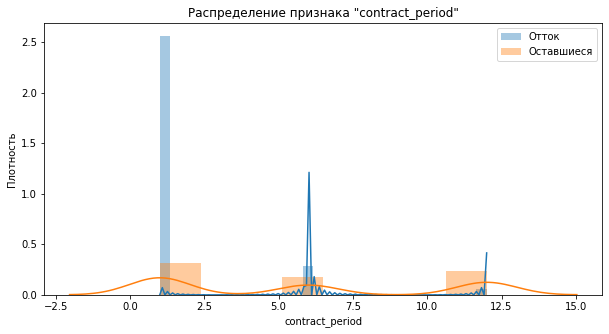

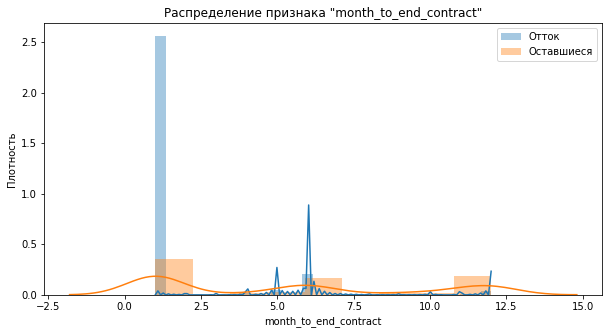

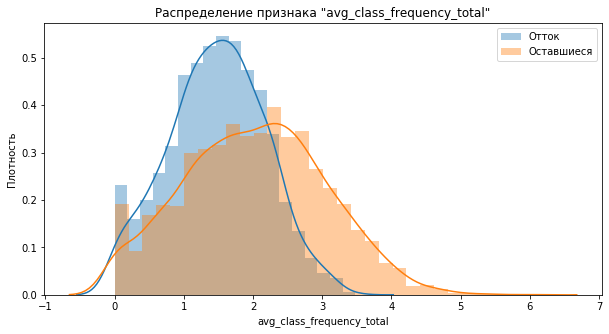

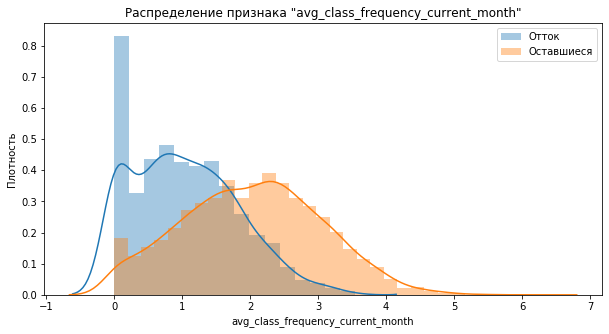

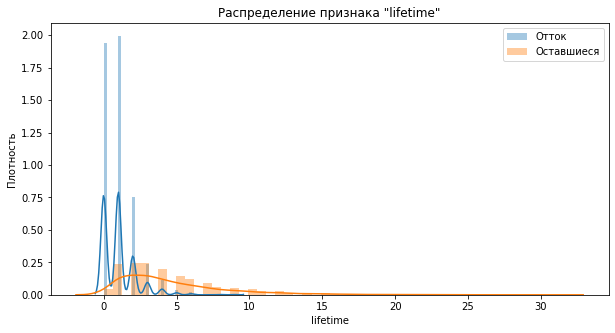

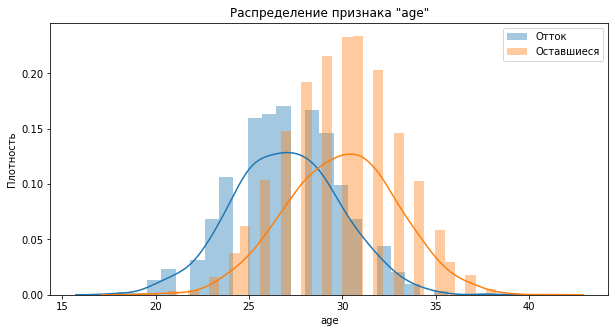

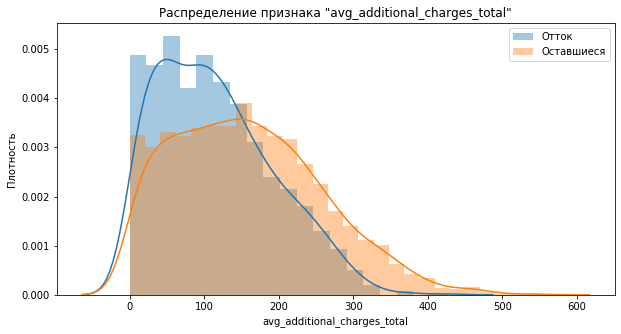

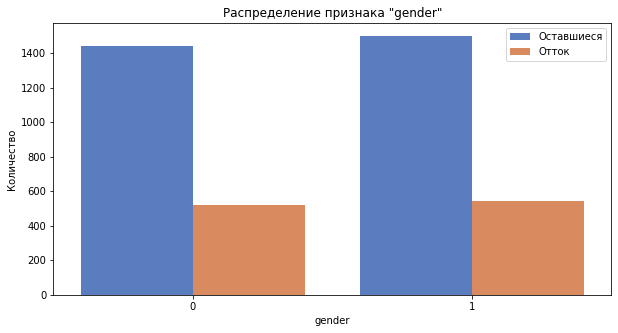

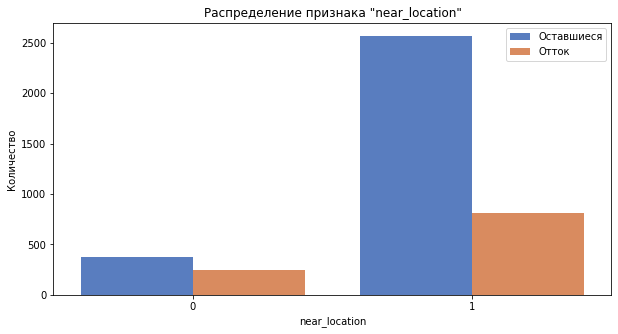

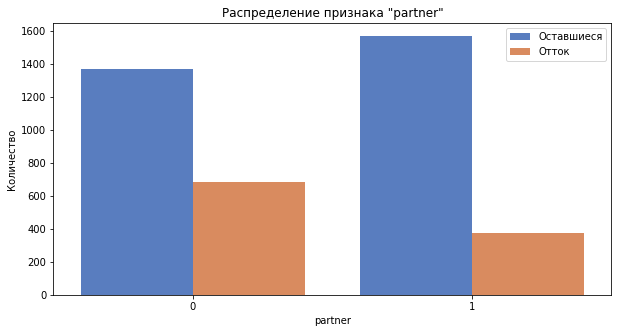

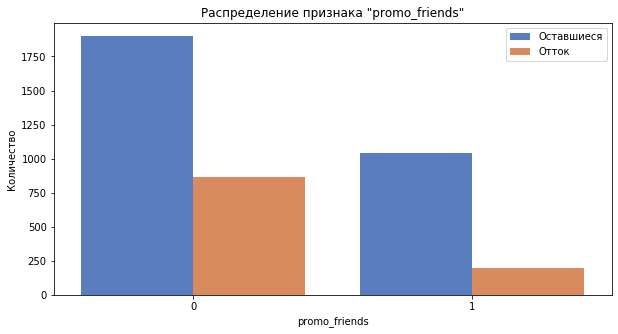

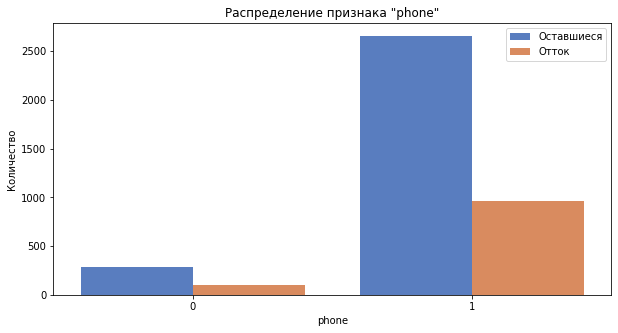

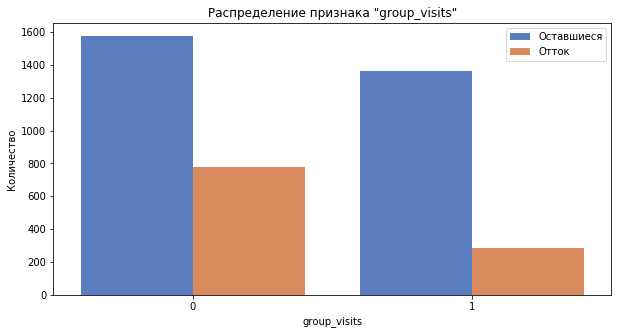

In [7]:
churn_group = gym_data[gym_data['churn']==1]   # группа оттока
stayed_group = gym_data[gym_data['churn']==0]  # группа оставшихся клиентов

# в цикле отрисуем графики

# по небинарным признакам:
for column in ['contract_period', 'month_to_end_contract', 'avg_class_frequency_total', \
               'avg_class_frequency_current_month', 'lifetime', 'age', \
                'avg_additional_charges_total']: 
    plt.figure(figsize=(10,5))
    plt.title('Распределение признака "{}"'.format(column))
    sns.distplot(churn_group[column])
    sns.distplot(stayed_group[column])
    plt.legend(['Отток', 'Оставшиеся'])
    plt.ylabel('Плотность')
    plt.show()
        
# по бинарным признакам:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']:
    plt.figure(figsize=(10,5)) 
    sns.countplot(data=gym_data, x=gym_data[column], hue='churn', palette='muted')
    plt.title('Распределение признака "{}"'.format(column))
    plt.legend(['Оставшиеся', 'Отток'])
    plt.ylabel('Количество')
    plt.show()

Учитывая ранее описанные средние показатели всех признаков, исходя из данных графиков распределения можно выделить основные признаки наиболее характерные для группы оттока:

- `contract_period`: длительность текущего абонемента = 1 месяцу
- `month_to_end_contract`: срок до окончания текущего абонемента также 1 месяц (что говорит о том, что вероятно купленный на 1 месяц абонемент так и не был востребован клиентом)
- `age`: возраст клиентов группы оттока чаще всего лежит в районе от 25 до 30 ("оставшиеся" клиенты по возрасту старше)
- `near_location`: удивительно, что большая часть клиентов "оттока" проживала или работала рядом с клубом


### Матрица корреляций

Построим матрицу корреляций для обоих групп.

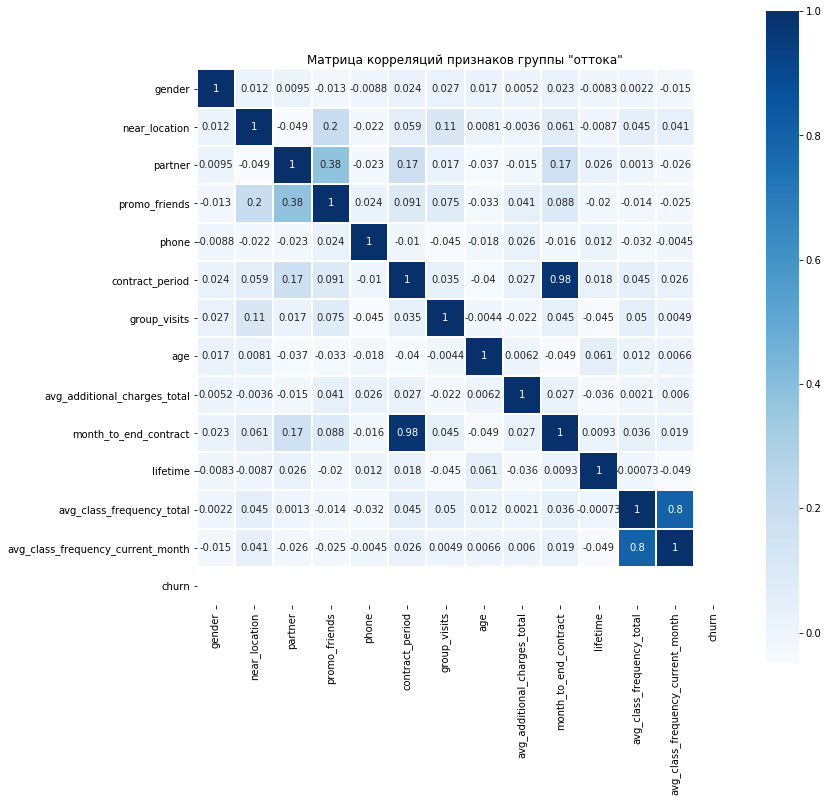

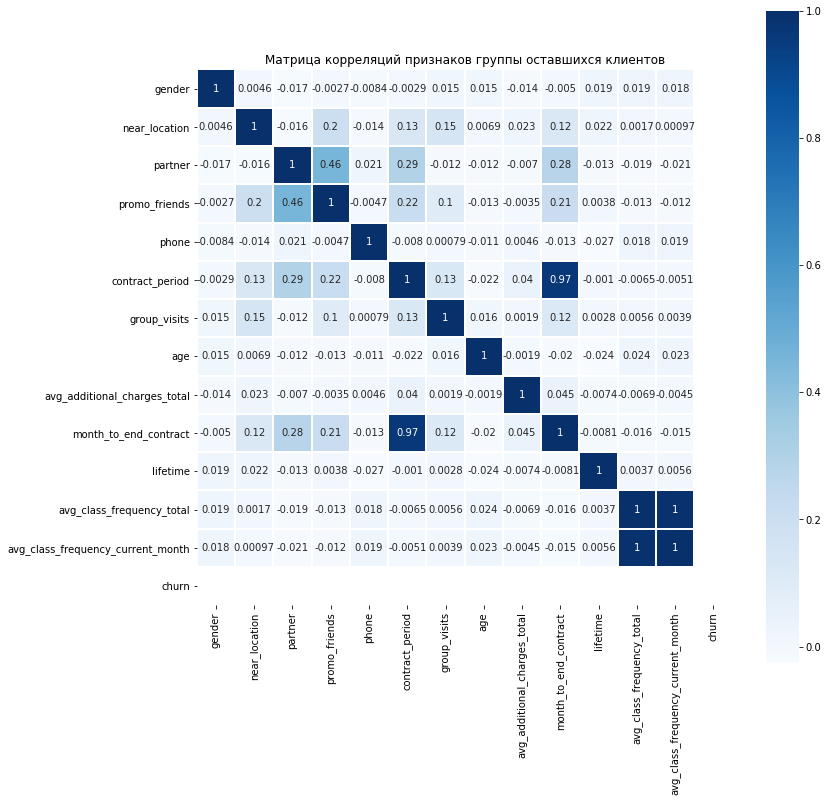

In [8]:
plt.figure(figsize=(12,12))
sns.heatmap(data = churn_group.corr(), annot=True, square=True, linewidths=1, linecolor='white', cmap='Blues')
plt.title('Матрица корреляций признаков группы "оттока"')
plt.show()

plt.figure(figsize=(12,12))
sns.heatmap(data = stayed_group.corr(), annot=True, square=True, linewidths=1, linecolor='white', cmap='Blues')
plt.title('Матрица корреляций признаков группы оставшихся клиентов')
plt.show()

Мы видим, что в обоих группах сильно коррелирует `month_to_end_contract` и `contract_period`, а также `avg_class_frequency_current_month` и `avg_class_frequency_total`. Это взаимосвязанные мультиколлинеарные признаки, поэтому данная корреляция не вызывает удивления. Другие же признаки не показали сильной корреляции.

## Построение модели прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце `churn`.

Для этого:

1. Разобьем данные на обучающую и валидационную выборки функцией `train_test_split()` в пропорции 80 на 20.

2. Обучим модель на train-выборке двумя способами: логистической регрессией и случайным лесом.

3. Оценим метрики `accuracy`, `precision` и `recall` для обеих моделей на валидационной выборке. Сравним по ним модели. И посмотрим какая модель показала себя лучшей.

In [9]:
X = gym_data.drop(['churn'], axis = 1)
y = gym_data['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_st, y_train)
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
print('Метрики для модели логистической регрессии:')
print('Accurancy: {}\nPrecision: {}\nRecall:{}'.format(
    accuracy_score(y_test, lr_predictions),
    precision_score(y_test, lr_predictions),
    recall_score(y_test, lr_predictions)
))
print('---------------------------------------------------------------------------------------------------------------------')

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]
print('\nМетрики для модели случайного леса:')
print('Accurancy: {}\nPrecision: {}\nRecall:{}'.format(
    accuracy_score(y_test, rf_predictions),
    precision_score(y_test, rf_predictions),
    recall_score(y_test, rf_predictions)
))
print('---------------------------------------------------------------------------------------------------------------------')

Метрики для модели логистической регрессии:
Accurancy: 0.9225
Precision: 0.8541666666666666
Recall:0.8282828282828283
---------------------------------------------------------------------------------------------------------------------

Метрики для модели случайного леса:
Accurancy: 0.915
Precision: 0.8385416666666666
Recall:0.8131313131313131
---------------------------------------------------------------------------------------------------------------------


Метрики для модели логистической регрессии показали себя лучше в сравнении с метриками случайного леса.

Поэтому делаем вывод, что приоритетнее использовать модель логистической регрессии.

## Кластеризация клиентов

Проведем кластеризацию пользователей **без** столбца целевого значения `churn`.

Для этого:
1. Стандартизируем данные.
2. Построим матрицу расстояний функцией `linkage()` на стандартизированной матрице признаков и нарисуем дендограмму. Предположим, какое количество кластеров можем выделить.
3. Обучим модель кластеризации на основе алгоритма K-Means и спрогнозируем кластеры клиентов.

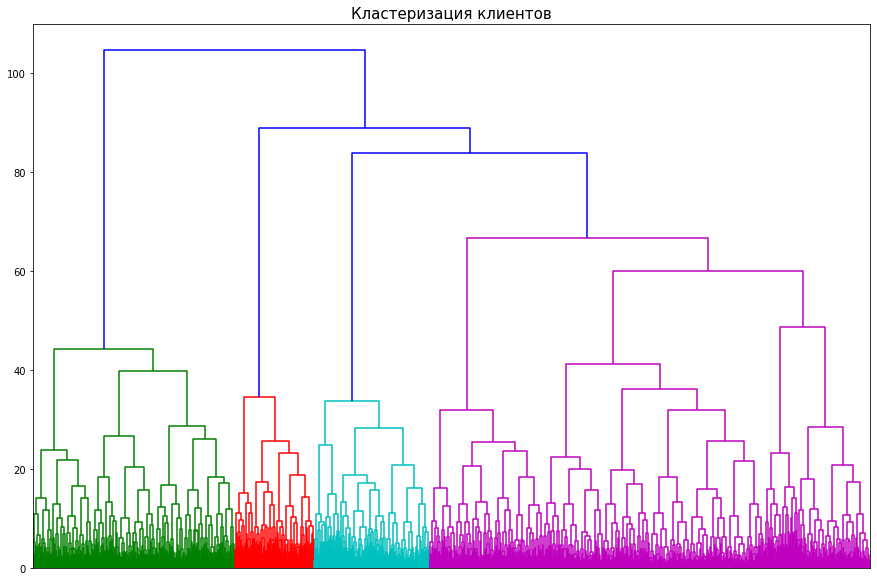

In [10]:
X_st = scaler.fit_transform(X)
linked = linkage(X_st, method='ward')
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top', no_labels=True)
plt.title('Кластеризация клиентов', fontsize=15)
plt.show()

Явно по цветовой окраске выделяются 4 кластера, но мы выберем 5 кластеров в соответствии с ТЗ.

In [11]:
# обучаем модель кластеризации на основе алгоритма K-Means и спрогнозируем кластеры клиентов

km = KMeans(n_clusters = 5, random_state = 0)
labels = km.fit_predict(X_st)
gym_data['cluster'] = labels

### Средние значения по кластерам

Для каждого полученного кластера посчитаем средние значения каждого признака и посмотрим на долю оттока (столбец `churn`).

In [12]:
cluster_churn_rate = (gym_data.groupby('cluster').mean().T).round(3)
cluster_churn_rate

cluster,0,1,2,3,4
gender,0.502,0.522,0.495,0.486,0.560
near_location,0.959,0.862,0.000,1.000,0.976
partner,0.783,0.470,0.463,0.350,0.356
promo_friends,0.575,0.306,0.079,0.240,0.229
phone,1.000,0.000,1.000,1.000,0.999
contract_period,10.884,4.787,2.352,1.948,2.665
group_visits,0.543,0.426,0.216,0.342,0.473
age,29.980,29.301,28.477,28.168,30.128
avg_additional_charges_total,160.707,143.958,135.458,131.622,161.724
month_to_end_contract,9.951,4.475,2.198,1.857,2.455


Явно выделяются 2 кластера: **2 и 3** (доля оттока 51% и 44%, соответственно). Остальные 3 кластера в лучших позициях. **Нулевой** кластер с долей оттока 2,8% показывает самые лучшие результаты. 

В этих лидирующих по оттоку **2 и 3 кластерах** наиболее заметно снижение показателей признаков по сравнению с остальными, наиболее выраженное снижение значений у признаков: `promo_friends`, `lifetime`, `contract_period` и `group_visits`.

В благоприятном **нулевом** кластере признаки `promo_friends`, `contract_period` (почти 11 месяцев), `month_to_end_contract`, `lifetime` имеют наибольшие показатели, которые отражают лояльность клиентов.

### Графики распределения признаков по кластерам

Построим для бинарных и небинарных признаков графики распределения по каждому кластеру.

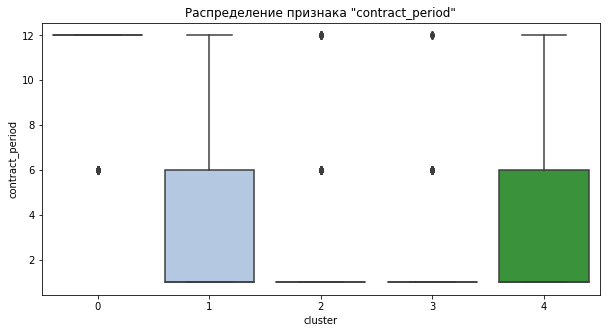

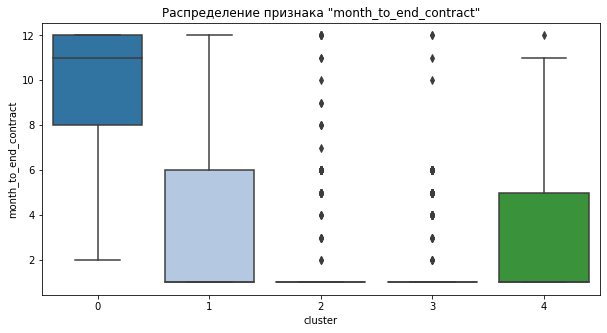

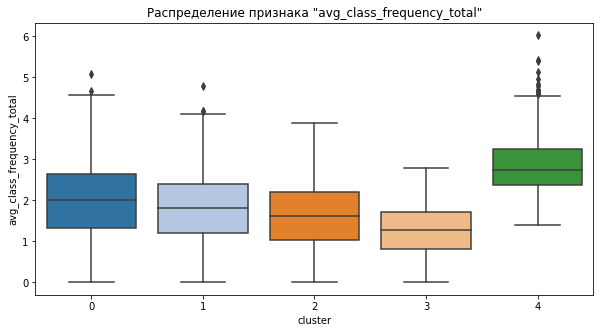

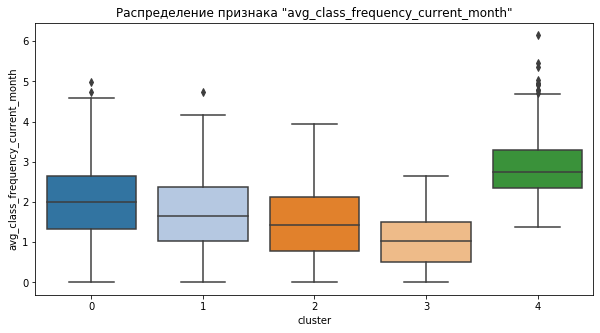

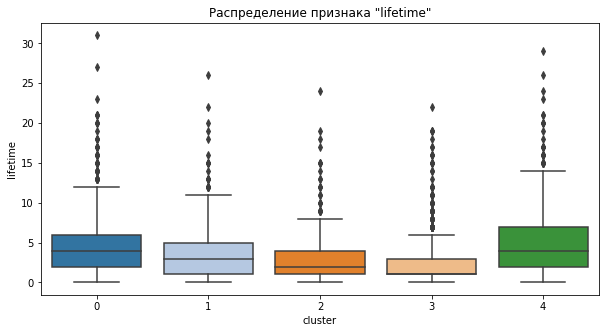

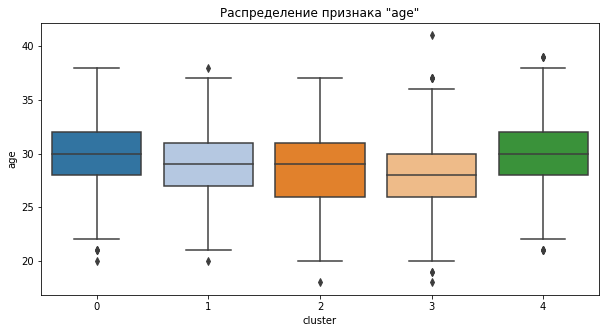

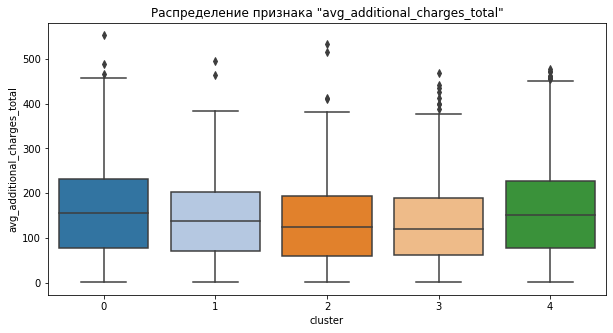

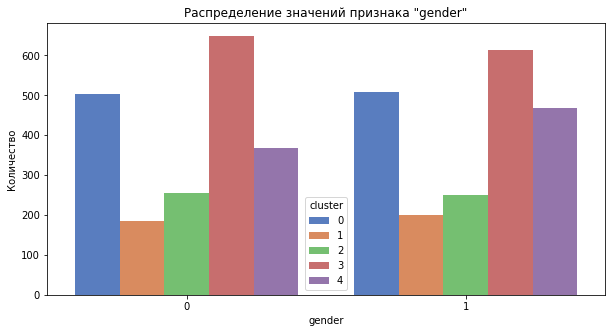

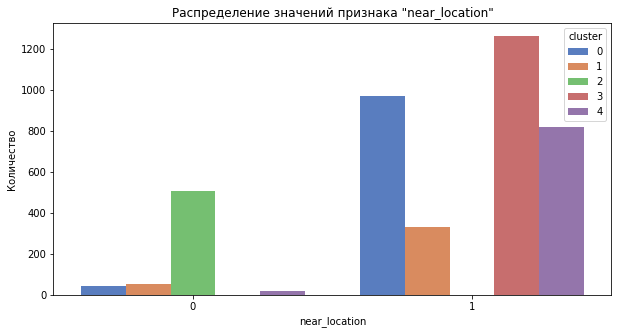

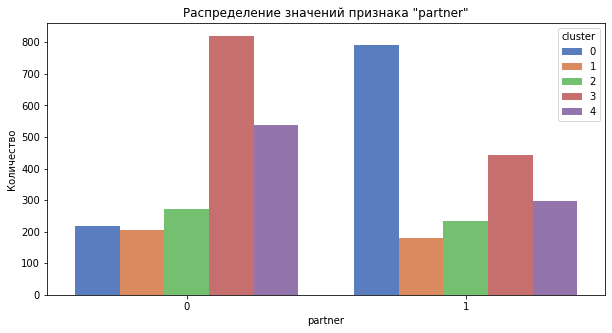

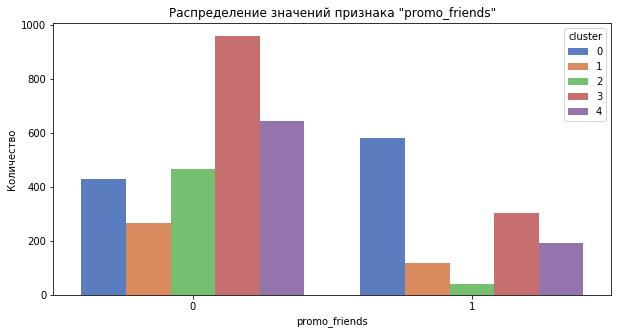

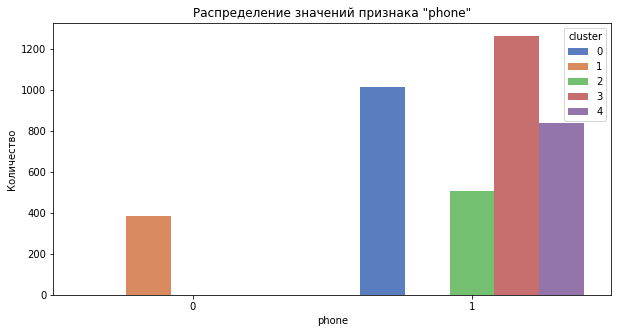

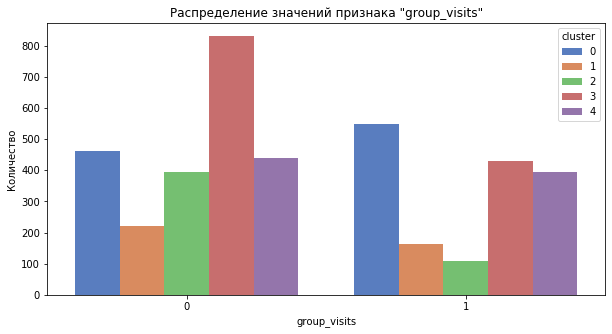

In [13]:
# в цикле отрисуем графики

# по небинарным признакам:
for column in ['contract_period', 'month_to_end_contract', 'avg_class_frequency_total', \
               'avg_class_frequency_current_month', 'lifetime', 'age', \
                'avg_additional_charges_total']: 
    plt.figure(figsize=(10,5)) 
    sns.boxplot(x = 'cluster', y = gym_data[column], data = gym_data, palette='tab20')
    plt.title('Распределение признака "{}"'.format(column))
    plt.ylabel(column)
    plt.show()
        
# по бинарным признакам:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']:
    plt.figure(figsize=(10,5)) 
    sns.countplot(data=gym_data, x=gym_data[column], hue='cluster', palette='muted')
    plt.title('Распределение значений признака "{}"'.format(column))
    #plt.legend(['Оставшиеся', 'Отток'])
    plt.ylabel('Количество')
    plt.show()

**Наши выводы из графиков распределения:**

*Для кластеров 2 и 3 с долей оттока 51% и 44%, соответственно, характерны:*
 - длительность текущего действующего абонемента `contract_period` не превышает 1 месяца (за очень редким исключением)
 - низкая посещаемость в неделю: 1 раз в неделю
 - время с момента первого посещения `lifetime` не превышает 1-3 месяцев
 - критерии `partner` и `promo_friends` не оказывает влияния на удержание

 
*Для кластеров 0 и 4 с долей оттока 2,8% и 6,8%, соответственно, характерны:*
- большая длительность абонемента: от 6 до 12 месяцев
- посещаемость от 2 раз в неделю и выше
- время с момента первого посещения превышает 4 месяца
- можно утверждать, что критерии `partner` и `promo_friends` благоприятно сказываются на удержании

Близкое или дальнее расположение клуба `near_location` не влияет на отток или удержание клиентов.

## Выводы и рекомендации

<div style="border: ridge black 3px; padding: 25px">
    
<b>В ходе проведенного исследования можно утверждать, что для удержания клиентов руководящему составу необходимо обратить внимание на:</b><br>
    
<b>1. Продажу абонементов на более долгий срок использования (от 6 до 12 месяцев).</b> Т.к. ходят чаще клиенты, которые покупают абонемент сроком на 1 месяц.<br><br>
    
<b>2. Отслеживание посещаемости клиентов.</b> Если клиент ходит 1 раз в неделю - это тревожный показатель. Для удержания клиентов рекомендуем рассмотреть возможность контакта менеджера по продажам с клиентом с проведением опроса почему клиент перестал посещать клуб или что его не устроило (по телефону или лично в клубе при его посещении).<br>
    
Также можно рассмотреть возможность телефонного обзвона клиентов с приглашением в клуб на групповую встречу с топовым тренером* (*на усмотрение клуба какого именно) или выгодным предложением: например, как для недавнего клиента клуба можно предложить выгодную цену на продление абонемента с включенными тренировками с тренером (например, на 6 месяцев) с бесплатными доп.услугами (снэками/питьевой водой/камерой хранения и пр.).<br><br>
    
<b>3. Расширение круга компаний-партнеров, через которых продавать абонементы на 6 и более месяцев</b> (с возможность запуска сезонных акций на покупку абонементов для этих же партнеров).<br><br>
    
<b>4. Использование промокода в рамках акции "Приведи друга" на покупку первого абонемента.</b> Данная акция благоприятно сказывается на удержании клиентов.<br>
    
</div>